In [9]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.quantum_info import Operator
from qiskit.ignis.verification import marginal_counts
import numpy as np
from qiskit.visualization import plot_histogram
print('done!')

<ipython-input-9-784d42e00167>:3: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification import marginal_counts


done!


In [10]:
# Oracle for target |1110> 
oracle_matrix1 = np.identity(2**4)
oracle_matrix1[14, 14] = -1

# Oracle for target |0011>
oracle_matrix2 = np.identity(2**4)
oracle_matrix2[3, 3] = -1

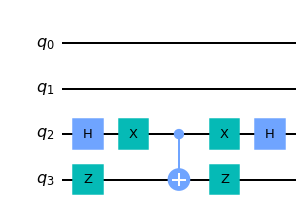

In [11]:
# local diffuser for the last two qubits
localdiffuser1 = QuantumCircuit(4)
localdiffuser1.h(2)
localdiffuser1.x(2)
localdiffuser1.z(3)
localdiffuser1.cx(2,3)
localdiffuser1.z(3)
localdiffuser1.x(2)
localdiffuser1.h(2)
localdiffuser1.draw('mpl')

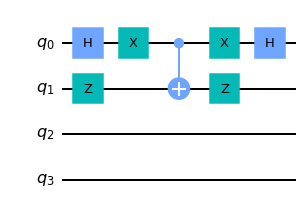

In [12]:
# local diffuser for the first two qubits
localdiffuser2 = QuantumCircuit(4)
localdiffuser2.h(0)
localdiffuser2.x(0)
localdiffuser2.z(1)
localdiffuser2.cx(0,1)
localdiffuser2.z(1)
localdiffuser2.x(0)
localdiffuser2.h(0)
localdiffuser2.draw('mpl')

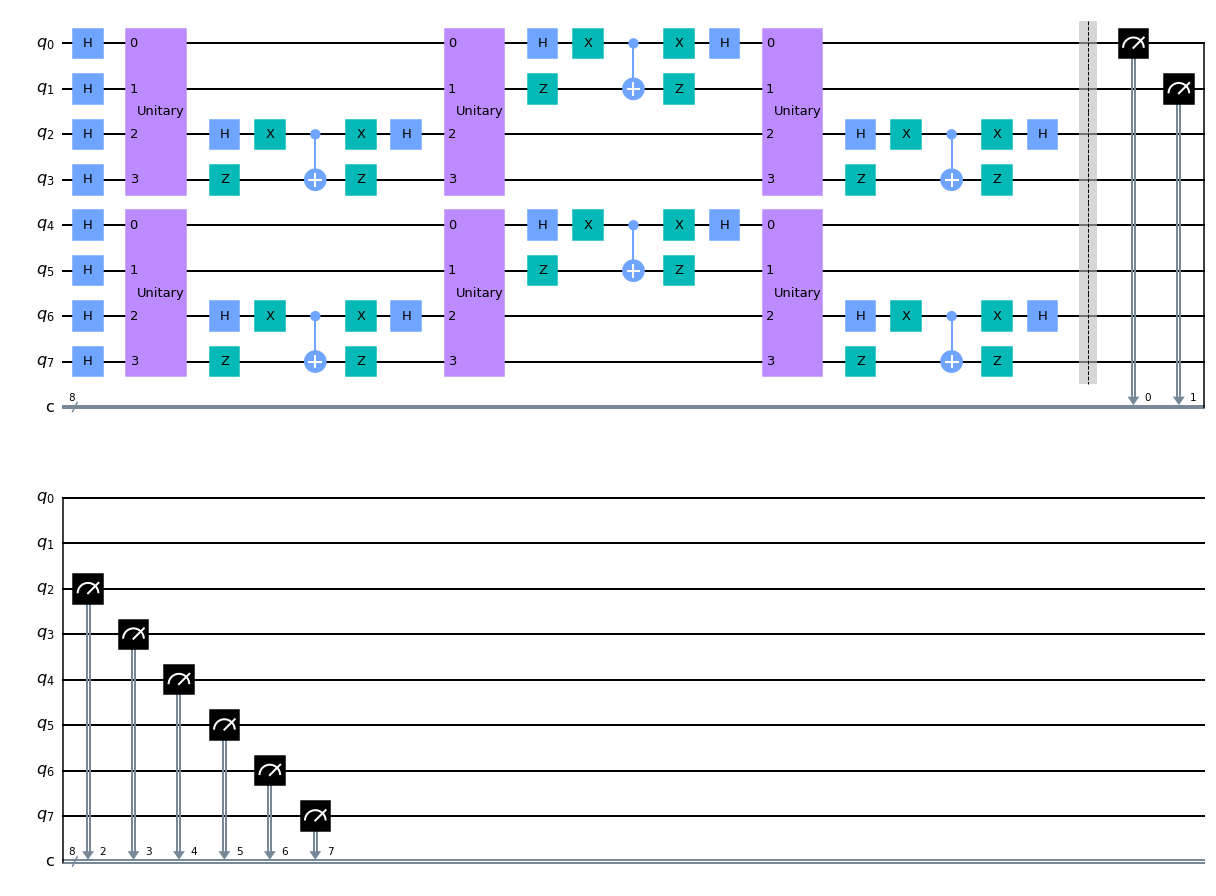

In [13]:
# Performing the 8-qubit hardware efficient quantum search algorithm considering the minimum number of iterations for each 4-qubit subsystem   
qc = QuantumCircuit(8,8)
qc.h(range(8))
## the first 4-qubit subsystem
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix1), [0,1,2,3])
# applying the local diffusion operator for the last two qubits
qc = qc.compose(localdiffuser1, [0,1,2,3])
# applying the oracle operator
qc.unitary(Operator(oracle_matrix1), [0,1,2,3])
# applying the local diffusion operator for the first two qubits
qc = qc.compose(localdiffuser2,[0,1,2,3])
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix1), [0,1,2,3])
# applying the local diffusion operator for the last two qubits
qc = qc.compose(localdiffuser1,[0,1,2,3])

## the second 4-qubit subsystem
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix2), [4,5,6,7])
# applying the local diffusion operator for the last two qubits
qc = qc.compose(localdiffuser1, [4,5,6,7])
# applying the oracle operator
qc.unitary(Operator(oracle_matrix2), [4,5,6,7])
# applying the local diffusion operator for the first two qubits
qc = qc.compose(localdiffuser2,[4,5,6,7])
# applying the oracle operator 
qc.unitary(Operator(oracle_matrix2), [4,5,6,7])
# applying the local diffusion operator for the last two qubits
qc = qc.compose(localdiffuser1,[4,5,6,7])



qc.barrier()      
qc.measure(range(8),range(8))      

qc.draw('mpl')

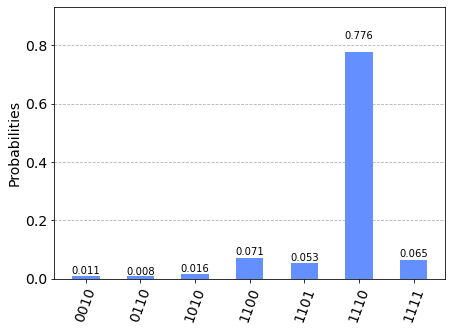

In [15]:
# measuring the first 4-qubit subsystem 
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
qubit_counts = [marginal_counts(counts, [0,1,2,3])]
plot_histogram(qubit_counts)

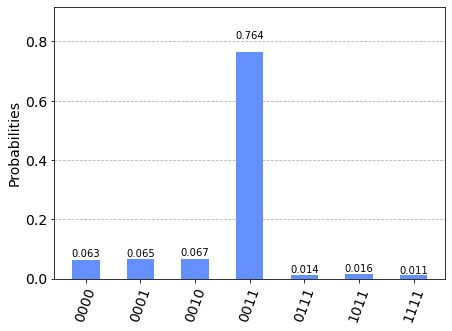

In [16]:
# measuring the second 4-qubit subsystem 
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
qubit_counts = [marginal_counts(counts, [4,5,6,7])]
plot_histogram(qubit_counts)

In [ ]:
# these results are considered for the post-process block